# 👨‍💻 Projeto Bolsa de Valores 💹💰

- O `yfinance` é uma biblioteca do Python usada para acessar dados financeiros do **Yahoo Finance**.
- Com ela, você pode obter informações sobre ações, índices, moedas, fundos e outros ativos financeiros diretamente pelo código.

In [1]:
# Instalando a biblioteca yfinance
!pip install yfinance

In [2]:
import pandas as pd
import yfinance as y

In [3]:
# Importando também uma biblioteca para trabalhar com gráficos
import matplotlib.pyplot as plt

In [4]:
# Dados Bolsa de Valores da Petrobás
df = y.download('petr4.sa', period='3y')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
# Pegando os 5 primeiros dados
df.head()

Price,Close,High,Low,Open,Volume
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA
Date,,,,,
2022-03-28,12.443795,12.632815,12.199644,12.624939,68610500
2022-03-29,12.719448,12.900592,12.569808,12.652504,93809000
2022-03-30,12.991164,12.991164,12.750951,12.798206,69648400
2022-03-31,13.172309,13.219563,12.798207,12.825772,94269500
2022-04-01,12.999038,13.306196,12.959659,13.211685,72545400


In [6]:
# Pegando os 5 últimmos dados
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA
Date,,,,,
2025-03-21,36.799999,37.029999,36.180000,36.220001,61175700
2025-03-24,36.750000,36.939999,36.500000,36.700001,20348000
2025-03-25,37.040001,37.520000,36.630001,36.849998,28036100
2025-03-26,37.389999,37.630001,37.150002,37.150002,26870300
2025-03-27,37.669998,0.000000,0.000000,0.000000,0


In [7]:
df.shape

(750, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750 entries, 2022-03-28 to 2025-03-27
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, PETR4.SA)   750 non-null    float64
 1   (High, PETR4.SA)    750 non-null    float64
 2   (Low, PETR4.SA)     750 non-null    float64
 3   (Open, PETR4.SA)    750 non-null    float64
 4   (Volume, PETR4.SA)  750 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.2 KB


---

## 📝 Perguntas de Negócio:

### 1. **Qual foi o valor de fechamento mais baixo?**

In [9]:
# Verificando as 10 primeiras linhas
df['Close'].iloc[0:10]

Ticker,PETR4.SA
Date,
2022-03-28,12.443795
2022-03-29,12.719448
2022-03-30,12.991164
2022-03-31,13.172309
2022-04-01,12.999038
2022-04-04,12.876966
2022-04-05,12.754889
2022-04-06,12.743074
2022-04-07,13.404643


In [10]:
# Verificando o valor de fechamento mais baixo usando o método min()
round(df['Close'].min(), 2) # Usando a função round para arrendondar o valor

,0
Ticker,
PETR4.SA,12.44


In [11]:
indice_min = df['Close'].idxmin()  # Retorna o índice do menorr valor de 'Close'
valor_mais_baixo = df.loc[indice_min]  # Obtém a linha correspondente

valor_mais_baixo

Price,Close,High,Low,Open,Volume
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA
Date,,,,,
2022-03-28,12.443795,12.632815,12.199644,12.624939,68610500


<br>

### 2. **Qual foi o valor de fechamento mais alto?**

In [12]:
# Verificando o valor de fechamento mais alto usando o método max()
round(df['Close'].max(), 2)

,0
Ticker,
PETR4.SA,38.5


In [13]:
indice_max = df['Close'].idxmax()  # Retorna o índice do maior valor de 'Close'
valor_mais_alto = df.loc[indice_max]  # Obtém a linha correspondente

valor_mais_alto

Price,Close,High,Low,Open,Volume
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA
Date,,,,,
2025-02-20,38.5,38.57,38.310001,38.419998,26641200


<br>

### 3. **Qual foi o preço médio de fechamento?**

In [14]:
# Verificando o valor médio de fechamento
round(df['Close'].mean(), 2)

,0
Ticker,
PETR4.SA,25.42


<br>

### 4. **Qual foi a maior queda do papel dentro do período?**

In [15]:
# Vamos criar uma nova coluna chamado variação usando o método pct_change()
df['Variacao'] = df['Close'].pct_change() * 100

- ``df['Close']``: Acessa a coluna "Close" do DataFrame, que provavelmente contém os preços de fechamento de um ativo financeiro (ações, criptomoedas, etc.).
- ``.pct_change()``: Esse método calcula a variação percentual entre um valor e o valor anterior na mesma coluna.
- ``* 100``: Multiplica o resultado por 100 para expressar a variação em porcentagem.
- ``df['Variacao']``: Armazena os valores calculados em uma nova coluna chamada "Variacao".

__Observação:__ O método ``.pct_change()`` do Pandas calcula a variação percentual entre os valores consecutivos de uma série ou coluna de um DataFrame.

In [16]:
df.head()

Price,Close,High,Low,Open,Volume,Variacao
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,
Date,,,,,,
2022-03-28,12.443795,12.632815,12.199644,12.624939,68610500,NaN
2022-03-29,12.719448,12.900592,12.569808,12.652504,93809000,2.215183
2022-03-30,12.991164,12.991164,12.750951,12.798206,69648400,2.136226
2022-03-31,13.172309,13.219563,12.798207,12.825772,94269500,1.394369
2022-04-01,12.999038,13.306196,12.959659,13.211685,72545400,-1.315420


#### Reformulando a pergunta:

**Qual foi o pior dia da queda do ativo?**

In [17]:
queda_ativo = df['Variacao'].min()

queda_ativo

-9.199377875789239

In [18]:
indice_pior_queda = df['Variacao'].idxmin()
pior_queda = df.loc[indice_pior_queda]

pior_queda

,,2022-10-24
Price,Ticker,
Close,PETR4.SA,2.019275e+01
High,PETR4.SA,2.170794e+01
Low,PETR4.SA,2.018096e+01
Open,PETR4.SA,2.151928e+01
Volume,PETR4.SA,1.421109e+08
Variacao,,-9.199378e+00


<br>

### 5. **Qual dia teve a maior alta do ativo?**

In [19]:
alta_ativo = df['Variacao'].max()

alta_ativo

7.986579964482754

In [20]:
indice_maior_alta = df['Variacao'].idxmax()
maior_alta = df.loc[indice_maior_alta]

maior_alta

,,2022-10-03
Price,Ticker,
Close,PETR4.SA,1.897234e+01
High,PETR4.SA,1.924354e+01
Low,PETR4.SA,1.866576e+01
Open,PETR4.SA,1.881316e+01
Volume,PETR4.SA,1.796941e+08
Variacao,,7.986580e+00


---

## 📈 Verificando o Comportamento da Bolsa de Valores pelo Gráfico

<Axes: xlabel='Date'>

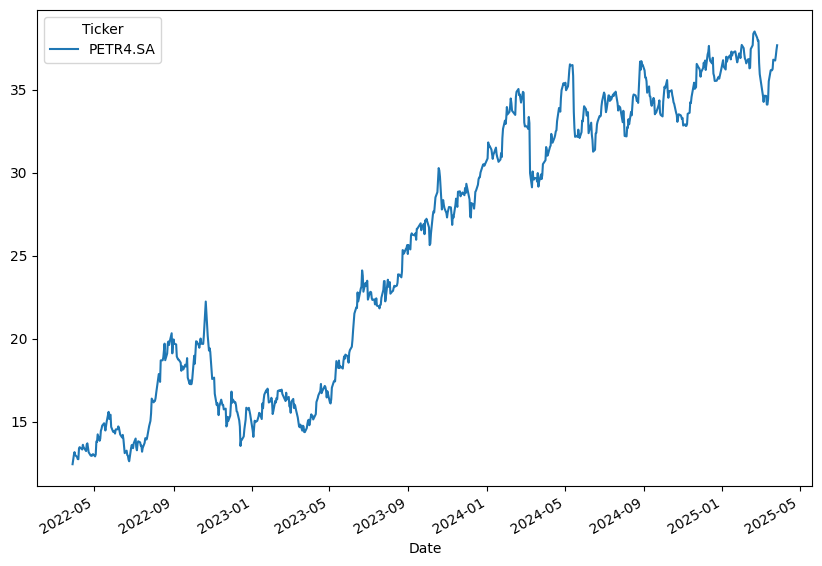

In [21]:
df['Close'].plot(figsize = (10, 7))

---

## 🕵️‍♂️ Pegando Dados por Período

In [22]:
## Pegando dados de 2024
df[df.index.year == 2024]

Price,Close,High,Low,Open,Volume,Variacao
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,
Date,,,,,,
2024-01-02,30.855402,30.945241,30.545053,30.577720,24043800,1.450041
2024-01-03,31.819120,31.949794,30.765560,30.871734,52300200,3.123338
2024-01-04,31.549608,32.137639,31.451600,31.949796,45344900,-0.847013
2024-01-05,31.623108,31.966126,31.369926,31.745613,35783700,0.232965
2024-01-08,31.386261,31.386261,30.716557,31.345426,35158100,-0.748968
...,...,...,...,...,...,...
2024-12-20,35.522152,36.004135,35.387197,35.820983,59277400,-0.834237
2024-12-23,35.531796,35.714948,35.396841,35.666750,43785600,0.027148


In [23]:
## Pegando dados do mês de Outubro
df[df.index.month == 10]

Price,Close,High,Low,Open,Volume,Variacao
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,
Date,,,,,,
2022-10-03,18.972340,19.243541,18.665763,18.813156,179694100,7.986580
2022-10-04,18.494791,19.443997,18.317920,19.396833,115917200,-2.517078
2022-10-05,19.190477,19.349661,18.394560,18.518369,92893700,3.761526
2022-10-06,19.844902,19.921547,19.125627,19.455786,82671900,3.410153
2022-10-07,19.827213,20.234015,19.585490,19.797735,73500100,-0.089135
...,...,...,...,...,...,...
2024-10-25,33.515171,33.830390,33.237034,33.339017,32585900,0.696363
2024-10-28,33.459545,33.496631,32.764210,32.903278,27507100,-0.165972


In [24]:
df[df.index.month == 10].head()

Price,Close,High,Low,Open,Volume,Variacao
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,
Date,,,,,,
2022-10-03,18.972340,19.243541,18.665763,18.813156,179694100,7.986580
2022-10-04,18.494791,19.443997,18.317920,19.396833,115917200,-2.517078
2022-10-05,19.190477,19.349661,18.394560,18.518369,92893700,3.761526
2022-10-06,19.844902,19.921547,19.125627,19.455786,82671900,3.410153
2022-10-07,19.827213,20.234015,19.585490,19.797735,73500100,-0.089135


In [25]:
df[df.index.month == 10].shape

(64, 6)

In [26]:
## Pegando dados dos dias 10
df[df.index.day == 10]

Price,Close,High,Low,Open,Volume,Variacao
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,
Date,,,,,,
2022-05-10,13.975339,14.151969,13.871946,13.940875,60330600,0.870646
2022-06-10,14.234375,14.407204,13.951128,14.407204,63101700,-1.396733
2022-08-10,17.815775,18.075019,17.575735,18.075019,78369600,-0.322310
2022-10-10,19.603182,19.980506,19.455789,19.839010,52222600,-1.129919
2022-11-10,15.399551,15.853519,15.098871,15.375968,145470100,-2.899620
2023-01-10,15.194939,15.207554,14.740794,15.106633,52741100,0.921651
2023-02-10,16.853828,16.897982,16.355531,16.387068,54683100,3.046644
2023-03-10,15.756313,16.134768,15.731084,15.869850,48118600,-1.303827
